In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np; import sys

In [2]:
def deslocaEsquerda(a):
    d=a.copy(); d[:,0:-1]=a[:,1:]; return d
def deslocaDireita(a):
    d=a.copy(); d[:,1:]=a[:,0:-1]; return d
def deslocaCima(a):
    d=a.copy(); d[0:-1,:]=a[1:,:]; return d
def deslocaBaixo(a):
    d=a.copy(); d[1:,:]=a[0:-1,:]; return d

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

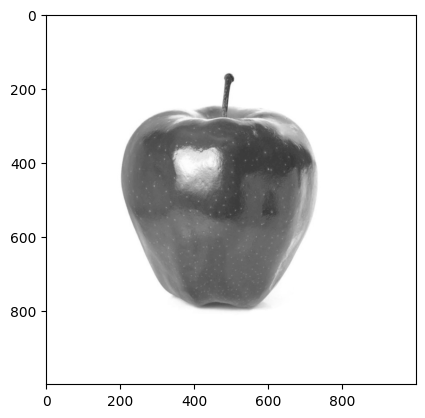

In [4]:
AX = np.ndarray((3,1000,1000))
AX[0] = rgb2gray(image.imread('maca.png'))
AX[1] = rgb2gray(image.imread('banana.png'))
AX[2] = rgb2gray(image.imread('pera.png'))

AY = np.array([0,1,2])

plt.imshow(AX[0], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()


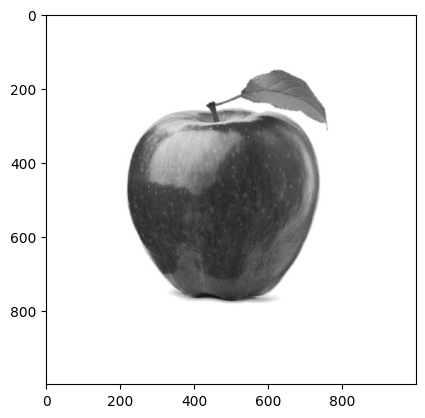

In [5]:
QX = np.ndarray((3,1000,1000))
QX[0] = rgb2gray(image.imread('maca2.png'))
QX[1] = rgb2gray(image.imread('banana2.png'))
QX[2] = rgb2gray(image.imread('pera2.png'))

QY = np.array([0,1,2])

plt.imshow(QX[0], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [6]:
print("Fazendo manualmente data augmentation")
AX.resize((5*3,1000,1000))
AY.resize((5*3,1))
for s in range(3):
    AX[s+(3)]=deslocaEsquerda(AX[s])
    AX[s+(2*3)]=deslocaDireita(AX[s])
    AX[s+(3*3)]=deslocaCima(AX[s])
    AX[s+(4*3)]=deslocaBaixo(AX[s])
    AY[s+(3)]=AY[s]
    AY[s+(2*3)]=AY[s]
    AY[s+(3*3)]=AY[s]
    AY[s+(4*3)]=AY[s]

Fazendo manualmente data augmentation


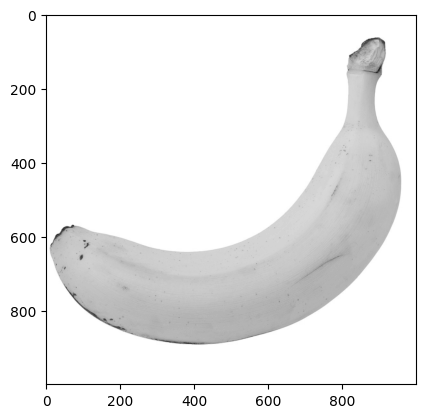

In [7]:
plt.imshow(AX[1], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [8]:
print("Convertendo para categorico e float")
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = AX.astype('float32') / 255.0 - 0.5 # -0.5 a +0.5
QX = QX.astype('float32') / 255.0 - 0.5 # -0.5 a +0.5
AX = AX.reshape(AX.shape[0], nl, nc, 1)
QX = QX.reshape(QX.shape[0], nl, nc, 1)

Convertendo para categorico e float


In [9]:
print("Construindo modelo")
model = Sequential()
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl,nc,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nclasses, activation='softmax'))

Construindo modelo


In [10]:
print("Treinando modelo")
opt=optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

Treinando modelo


In [11]:
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
factor=0.9, patience=10, min_lr=0.0001, verbose=True)
model.fit(AX, AY2, batch_size=15, epochs=30, verbose=2, validation_data=(QX, QY2), callbacks=[reduce_lr])

Epoch 1/30
1/1 - 11s - loss: 2.3987 - accuracy: 0.0000e+00 - val_loss: 34.9570 - val_accuracy: 0.3333 - lr: 0.0010 - 11s/epoch - 11s/step
Epoch 2/30
1/1 - 10s - loss: 153.4190 - accuracy: 0.0667 - val_loss: 24.2097 - val_accuracy: 0.3333 - lr: 0.0010 - 10s/epoch - 10s/step
Epoch 3/30
1/1 - 7s - loss: 69.3655 - accuracy: 0.2000 - val_loss: 16.2121 - val_accuracy: 0.3333 - lr: 0.0010 - 7s/epoch - 7s/step
Epoch 4/30
1/1 - 7s - loss: 56.6638 - accuracy: 0.2000 - val_loss: 15.0524 - val_accuracy: 0.3333 - lr: 0.0010 - 7s/epoch - 7s/step
Epoch 5/30

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
1/1 - 8s - loss: 65.1772 - accuracy: 0.0667 - val_loss: 9.4248 - val_accuracy: 0.3333 - lr: 0.0010 - 8s/epoch - 8s/step
Epoch 6/30
1/1 - 8s - loss: 48.2889 - accuracy: 0.1333 - val_loss: 5.6157 - val_accuracy: 0.3333 - lr: 9.0000e-04 - 8s/epoch - 8s/step
Epoch 7/30

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0008100000384729356.
1/1 - 8s - loss: 25.6337 - accu

In [ ]:
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))
model.save("cnn2.h5")